In [1]:
#Data handling visualizing and Machine Learning
import numpy as np
import pandas as pd
import warnings
import itertools
import statsmodels
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Utilities
import datetime
from dateutil import parser #used for parsing datetime columns
from IPython.display import display
from IPython.display import Image #used for displaying images

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('statsmodels version:', statsmodels.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.20.3
pandas version: 1.3.4
statsmodels version: 0.12.2
matplotlib version: 3.4.3


In [2]:
#This data only includes journeys with Schiphol Airport as end destination in January
df = pd.read_csv('January_Schiphol_Time_Groups.csv')
df.shape

(76315, 16)

In [3]:
df = df.drop(columns = ["Unnamed: 0", "Train_Departure_Planned_Time"])

Time_Group is a category that indicates which part of the day the specific train on that row planned to depart, it can have 5 different values:
- 1 Early_Morning        (00:00 - 05:59)
- 2 Morning_Rush_Hour    (06:00 - 09:59)
- 3 Between_Rush_hours   (10:00 - 14:59)
- 4 Afternoon_Rush_hour  (15:00 - 18:59)
- 5 Night                (19:00 - 24:00)

In [4]:
#I add a time group number
df["Time_Group_Number"] = np.where(df['Time_Group'] == 'Early_Morning', 1,
                          np.where(df['Time_Group'] == 'Morning_Rush_Hour', 2,
                          np.where(df['Time_Group'] == 'Between_Rush_hours', 3,
                          np.where(df['Time_Group'] == 'Afternoon_Rush_hour', 4,
                          np.where(df['Time_Group'] == 'Night', 5, 0)))))

In [5]:
df['Train_Departure_Actual'] = df.apply(lambda row: parser.parse(row.Train_Departure_Actual), axis=1)
df['Train_Departure_Planned'] = df.apply(lambda row: parser.parse(row.Train_Departure_Planned), axis=1)
df["day_of_week"] = df["day_of_week"].astype("category")
df["Time_Group"] = df["Time_Group"].astype("category")
df["Train_Type"] = df["Train_Type"].astype("category")
df.dtypes

Station_Code                         object
Station_Name                         object
Train_Number                          int64
Train_Type                         category
Train_Company                        object
Train_Destination_Planned            object
Train_Destination_Actual             object
Train_Departure_Planned      datetime64[ns]
Train_Departure_Actual       datetime64[ns]
Train_Delay                         float64
MaxNumberOfStops                      int64
weekday                               int64
day_of_week                        category
Time_Group                         category
Time_Group_Number                     int32
dtype: object

In [6]:
df.set_index('Train_Departure_Planned', inplace=True)
df

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Time_Group,Time_Group_Number
Train_Departure_Planned,,,,,,,,,,,,,,
2016-01-01 06:44:00,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,0.0,10,4,Friday,Morning_Rush_Hour,2
2016-01-01 06:48:00,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,0.0,10,4,Friday,Morning_Rush_Hour,2
2016-01-01 07:00:00,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,0.0,10,4,Friday,Morning_Rush_Hour,2
2016-01-01 07:02:00,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,0.0,10,4,Friday,Morning_Rush_Hour,2
2016-01-01 07:09:00,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,0.0,10,4,Friday,Morning_Rush_Hour,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-31 22:53:00,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,0.0,13,6,Sunday,Night,5
2016-01-31 23:10:00,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,0.0,6,6,Sunday,Night,5
2016-01-31 23:40:00,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,0.0,6,6,Sunday,Night,5


In [7]:
#Here I remove previously found negative delays.
#I change them into 0
df.loc[df.Train_Delay < 0, 'Train_Delay'] = 0

I'll start by creating a column that makes a consecutive timegroup sum

Since there are 5 time groups per day and 31 days in january, Time_Group_Day will go from 1 to 155(31*5). This is of course also extendable to 
(e.g. 1 represents Early_Morning day one of January)
(e.g. 5 represents Night of day one of January
- 1 Early_Morning        (00:00 - 05:59)
- 2 Morning_Rush_Hour    (06:00 - 09:59)
- 3 Between_Rush_hours   (10:00 - 14:59)
- 4 Afternoon_Rush_hour  (15:00 - 18:59)
- 5 Night                (19:00 - 24:00)

I might be able to do this using a more cookbook method using numpy's clipping function
Here I found a helpful solution I will investigate further
(https://stackoverflow.com/questions/15408156/resampling-with-custom-periods)
No absolutely not this will take too long. There is a better way to do this that is more useful to learn but it will take ages to learn

In [8]:
df['Time_Group_Day'] = df['Time_Group_Number'] + (df.index.day - df.index.day.min())*5

In [9]:
#Early morning but it's february
df.loc[df['Time_Group_Day'] == 1]

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Time_Group,Time_Group_Number,Time_Group_Day
Train_Departure_Planned,,,,,,,,,,,,,,,
2016-02-01 00:02:00,RTD,Rotterdam Centraal,1406,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-02-01 00:02:00,0.0,2,0,Monday,Early_Morning,1,1


As you can see above the train which departs in early morning on day 1 of the month is actually departing in feburary and so should actually be after the last day of January.
Let's change it to 156 manually bthen since it's chronologically after 155

In [10]:
df.loc[df.Time_Group_Day == 1, 'Time_Group_Day'] = 156

In [11]:
dftiny = df[['Train_Delay', 'Time_Group_Number', 'Time_Group_Day']]

In [12]:
dftiny

,Train_Delay,Time_Group_Number,Time_Group_Day
Train_Departure_Planned,,,
2016-01-01 06:44:00,0.0,2,2
2016-01-01 06:48:00,0.0,2,2
2016-01-01 07:00:00,0.0,2,2
2016-01-01 07:02:00,0.0,2,2
2016-01-01 07:09:00,0.0,2,2
...,...,...,...
2016-01-31 22:53:00,0.0,5,155
2016-01-31 23:10:00,0.0,5,155
2016-01-31 23:40:00,0.0,5,155


In [13]:
pd.unique(dftiny.Time_Group_Day)

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
      dtype=int64)

*Morning Rush hour* of January 1st is time group 2

.
.
.
.

*Early Morning* of February 1st is time group 156

In [14]:
dftiny['Train_Departure_Planned'] = dftiny.index

C:\Users\david\AppData\Local\Temp/ipykernel_7644/2101051772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftiny['Train_Departure_Planned'] = dftiny.index


In [15]:
#Here I want to group train departures by the part of the day they departed in.

#However I want to do different things with each column
#I want to get the average delay
#but I want the median time as that time's the closest to all departures

#After this attempt I want to use Alex's clustering to define more accurate time groups  
#this will help sarimax take rush hours into account
grouped = dftiny.groupby(['Time_Group_Day'], as_index=False)
grouped

In [16]:
#I get the median time per time group
grouped_time = grouped['Train_Departure_Planned'].median()

In [17]:
#I calculate average delay per time group
grouped_delay = grouped['Train_Delay'].mean()

In [18]:
dfGroupie = grouped_time.merge(grouped_delay)

In [19]:
dfGroupie.drop(columns='Time_Group_Day', inplace=True)

In [20]:
dfGroupie.set_index('Train_Departure_Planned', inplace=True)

In [21]:
dfGroupie.drop(index='2016-02-01 00:02:00', inplace=True)
dfGroupie

,Train_Delay
Train_Departure_Planned,
2016-01-01 08:36:00,58.196078
2016-01-01 12:27:00,15.819193
2016-01-01 16:53:00,33.414191
2016-01-01 20:40:00,128.553425
2016-01-02 04:41:00,49.087719
...,...
2016-01-31 04:27:00,31.684211
2016-01-31 08:30:00,56.927326
2016-01-31 12:42:30,58.666667


HAHA!
now I have an average delay by time group and I can make this time group is customizable. 
So I can later change the time groups to better fit rush hour timing.

First let's see if it actually helps with predicting delay better

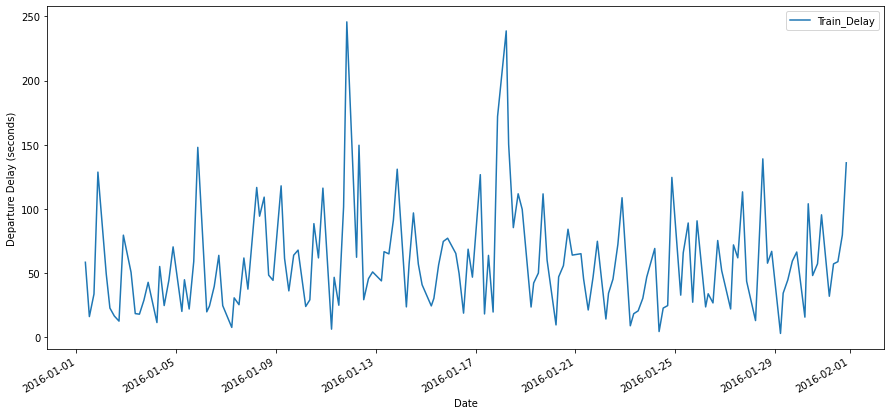

In [22]:
#154 rows for nearly every time group from January
ax = dfGroupie.plot(figsize=(15,7))
ax.set_xlabel('Date')
ax.set_ylabel('Departure Delay (seconds)')
plt.show()

In [23]:
dfGroupie.describe()

,Train_Delay
count,154.000000
mean,58.430715
std,41.159437
min,2.669291
25%,26.613740
50%,50.088431
75%,72.106210
max,245.764957


## GRID SEARCHING SETUP

## Seasonality component
Below you can see I feed 3 differnt pdq values along with a '5' into the seasonal_pdq variable.
The 5 represents the seasonality component I want to feed the SARIMAX algorithm.
Specifically I chose 5 because we sliced each day into 5 parts related to rush hours:
- 1 Early_Morning        (00:00 - 05:59)
- 2 Morning_Rush_Hour    (06:00 - 09:59)
- 3 Between_Rush_hours   (10:00 - 14:59)
- 4 Afternoon_Rush_hour  (15:00 - 18:59)
- 5 Night                (19:00 - 24:00)

With this I can (for example) compare early morning train delays with other early morning train delays.
In the end the algorithm will try to find patterns there and attempt to forecast delay duration based on these patterns

In [24]:
# Define the p, d and q parameters to take any value between 0 and 4 (INCREASING THIS MAKES IT TAKE AGES)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
# Also called cartesian product (often mentioned in statistics and this field)
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets

seasonal_pdq = [(x[0], x[1], x[2], 5) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 0, 2, 5)
SARIMAX: (0, 0, 2) x (0, 1, 0, 5)
SARIMAX: (0, 0, 2) x (0, 1, 1, 5)


**S**ARIMA**X** uses **S**easonality and e**X**ogenous features which ARIMA does not. With patterns like weekdays and rush hours probably having a high impact in train delays it is best if we use SARIMAX.

In [25]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

all_aic = []
best_params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfGroupie,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            #best accuracy values
            all_aic.append(results.aic)
            if(results.aic <= min(all_aic)):
                best_params.clear()
                best_params.append(param)
                best_params.append(param_seasonal)
                best_params.append(results.aic)
            print('SARIMAX{}x{}5 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 5)5 - AIC:1742.6081375506747
SARIMAX(0, 0, 0)x(0, 0, 1, 5)5 - AIC:1631.9557296416758
SARIMAX(0, 0, 0)x(0, 0, 2, 5)5 - AIC:1557.727452947343
SARIMAX(0, 0, 0)x(0, 1, 0, 5)5 - AIC:1592.8675111839048
SARIMAX(0, 0, 0)x(0, 1, 1, 5)5 - AIC:1476.1339849165952
SARIMAX(0, 0, 0)x(0, 1, 2, 5)5 - AIC:1426.857341410908
SARIMAX(0, 0, 0)x(0, 2, 0, 5)5 - AIC:1691.3131516627636
SARIMAX(0, 0, 0)x(0, 2, 1, 5)5 - AIC:1509.0395929249075
SARIMAX(0, 0, 0)x(0, 2, 2, 5)5 - AIC:1408.3038997080112
SARIMAX(0, 0, 0)x(1, 0, 0, 5)5 - AIC:1584.5422519622596
SARIMAX(0, 0, 0)x(1, 0, 1, 5)5 - AIC:1528.3244868724987
SARIMAX(0, 0, 0)x(1, 0, 2, 5)5 - AIC:1479.2699825339732
SARIMAX(0, 0, 0)x(1, 1, 0, 5)5 - AIC:1527.9032395171525
SARIMAX(0, 0, 0)x(1, 1, 1, 5)5 - AIC:1477.1314114980112
SARIMAX(0, 0, 0)x(1, 1, 2, 5)5 - AIC:1428.5381620958224
SARIMAX(0, 0, 0)x(1, 2, 0, 5)5 - AIC:1580.5701426631347
SARIMAX(0, 0, 0)x(1, 2, 1, 5)5 - AIC:1487.2845615010465
SARIMAX(0, 0, 0)x(1, 2, 2, 5)5 - AIC:1410.13212142

SARIMAX(0, 1, 2)x(1, 1, 1, 5)5 - AIC:1449.3708969242794
SARIMAX(0, 1, 2)x(1, 1, 2, 5)5 - AIC:1397.1909231561872
SARIMAX(0, 1, 2)x(1, 2, 0, 5)5 - AIC:1572.258378163186
SARIMAX(0, 1, 2)x(1, 2, 1, 5)5 - AIC:1463.0346205361413
SARIMAX(0, 1, 2)x(1, 2, 2, 5)5 - AIC:1381.896340635457
SARIMAX(0, 1, 2)x(2, 0, 0, 5)5 - AIC:1474.211304707947
SARIMAX(0, 1, 2)x(2, 0, 1, 5)5 - AIC:1476.2028393470828
SARIMAX(0, 1, 2)x(2, 0, 2, 5)5 - AIC:1449.4750112074744
SARIMAX(0, 1, 2)x(2, 1, 0, 5)5 - AIC:1460.6488564652009
SARIMAX(0, 1, 2)x(2, 1, 1, 5)5 - AIC:1430.0875006888575
SARIMAX(0, 1, 2)x(2, 1, 2, 5)5 - AIC:1399.0969568919977
SARIMAX(0, 1, 2)x(2, 2, 0, 5)5 - AIC:1492.9526781308284
SARIMAX(0, 1, 2)x(2, 2, 1, 5)5 - AIC:1435.12301655145
SARIMAX(0, 1, 2)x(2, 2, 2, 5)5 - AIC:1383.2833356368683
SARIMAX(0, 2, 0)x(0, 0, 0, 5)5 - AIC:1781.2403148435455
SARIMAX(0, 2, 0)x(0, 0, 1, 5)5 - AIC:1714.391959154911
SARIMAX(0, 2, 0)x(0, 0, 2, 5)5 - AIC:1660.8681293303703
SARIMAX(0, 2, 0)x(0, 1, 0, 5)5 - AIC:1779.707216392867

SARIMAX(1, 0, 1)x(2, 2, 1, 5)5 - AIC:1431.7332556701772
SARIMAX(1, 0, 1)x(2, 2, 2, 5)5 - AIC:1396.9909592204945
SARIMAX(1, 0, 2)x(0, 0, 0, 5)5 - AIC:1559.4604669579658
SARIMAX(1, 0, 2)x(0, 0, 1, 5)5 - AIC:1504.7471125006225
SARIMAX(1, 0, 2)x(0, 0, 2, 5)5 - AIC:1457.5745287556952
SARIMAX(1, 0, 2)x(0, 1, 0, 5)5 - AIC:1562.5135149152945
SARIMAX(1, 0, 2)x(0, 1, 1, 5)5 - AIC:1455.3015044779663
SARIMAX(1, 0, 2)x(0, 1, 2, 5)5 - AIC:1401.8689565719292
SARIMAX(1, 0, 2)x(0, 2, 0, 5)5 - AIC:1647.7277437237235
SARIMAX(1, 0, 2)x(0, 2, 1, 5)5 - AIC:1478.9784007678581
SARIMAX(1, 0, 2)x(0, 2, 2, 5)5 - AIC:1388.0948365061172
SARIMAX(1, 0, 2)x(1, 0, 0, 5)5 - AIC:1523.047555298667
SARIMAX(1, 0, 2)x(1, 0, 1, 5)5 - AIC:1505.8527030885302
SARIMAX(1, 0, 2)x(1, 0, 2, 5)5 - AIC:1456.2932386046998
SARIMAX(1, 0, 2)x(1, 1, 0, 5)5 - AIC:1514.9190036615223
SARIMAX(1, 0, 2)x(1, 1, 1, 5)5 - AIC:1452.1378229014763
SARIMAX(1, 0, 2)x(1, 1, 2, 5)5 - AIC:1403.1923314572186
SARIMAX(1, 0, 2)x(1, 2, 0, 5)5 - AIC:1559.0062388

SARIMAX(1, 2, 1)x(1, 0, 1, 5)5 - AIC:1534.5435425433075
SARIMAX(1, 2, 1)x(1, 0, 2, 5)5 - AIC:1486.8282466821684
SARIMAX(1, 2, 1)x(1, 1, 0, 5)5 - AIC:1542.7063086112512
SARIMAX(1, 2, 1)x(1, 1, 1, 5)5 - AIC:1489.165901493257
SARIMAX(1, 2, 1)x(1, 1, 2, 5)5 - AIC:1435.040291353592
SARIMAX(1, 2, 1)x(1, 2, 0, 5)5 - AIC:1588.4405017128054
SARIMAX(1, 2, 1)x(1, 2, 1, 5)5 - AIC:1502.7249031343958
SARIMAX(1, 2, 1)x(1, 2, 2, 5)5 - AIC:1418.9274809669341
SARIMAX(1, 2, 1)x(2, 0, 0, 5)5 - AIC:1495.6594026860928
SARIMAX(1, 2, 1)x(2, 0, 1, 5)5 - AIC:1497.6073754643887
SARIMAX(1, 2, 1)x(2, 0, 2, 5)5 - AIC:1488.4560263494488
SARIMAX(1, 2, 1)x(2, 1, 0, 5)5 - AIC:1481.4880190107374
SARIMAX(1, 2, 1)x(2, 1, 1, 5)5 - AIC:1448.3836842294477
SARIMAX(1, 2, 1)x(2, 1, 2, 5)5 - AIC:1436.901167017416
SARIMAX(1, 2, 1)x(2, 2, 0, 5)5 - AIC:1510.4537652734828
SARIMAX(1, 2, 1)x(2, 2, 1, 5)5 - AIC:1453.8859304490393
SARIMAX(1, 2, 1)x(2, 2, 2, 5)5 - AIC:1419.5572770798049
SARIMAX(1, 2, 2)x(0, 0, 0, 5)5 - AIC:1545.878683687

SARIMAX(2, 1, 0)x(2, 1, 1, 5)5 - AIC:1435.2482323228264
SARIMAX(2, 1, 0)x(2, 1, 2, 5)5 - AIC:1437.2157885244746
SARIMAX(2, 1, 0)x(2, 2, 0, 5)5 - AIC:1504.179799622432
SARIMAX(2, 1, 0)x(2, 2, 1, 5)5 - AIC:1441.6002913624702
SARIMAX(2, 1, 0)x(2, 2, 2, 5)5 - AIC:1416.6983728689456
SARIMAX(2, 1, 1)x(0, 0, 0, 5)5 - AIC:1559.253110135981
SARIMAX(2, 1, 1)x(0, 0, 1, 5)5 - AIC:1503.4326266348266
SARIMAX(2, 1, 1)x(0, 0, 2, 5)5 - AIC:1455.9709917637435
SARIMAX(2, 1, 1)x(0, 1, 0, 5)5 - AIC:1572.4752576200995
SARIMAX(2, 1, 1)x(0, 1, 1, 5)5 - AIC:1459.5688227910248
SARIMAX(2, 1, 1)x(0, 1, 2, 5)5 - AIC:1409.8403775798033
SARIMAX(2, 1, 1)x(0, 2, 0, 5)5 - AIC:1666.3162875549415
SARIMAX(2, 1, 1)x(0, 2, 1, 5)5 - AIC:1491.87178235608
SARIMAX(2, 1, 1)x(0, 2, 2, 5)5 - AIC:1392.939910512428
SARIMAX(2, 1, 1)x(1, 0, 0, 5)5 - AIC:1502.11304696499
SARIMAX(2, 1, 1)x(1, 0, 1, 5)5 - AIC:1503.9554023448522
SARIMAX(2, 1, 1)x(1, 0, 2, 5)5 - AIC:1457.9699779354846
SARIMAX(2, 1, 1)x(1, 1, 0, 5)5 - AIC:1501.225043769829


In [26]:
print('As you can see the most accurate hyperparameters are SARIMAX{}x{}5-AIC:{}', best_params[0], best_params[1], best_params[2])

As you can see the most accurate hyperparameters are SARIMAX{}x{}5-AIC:{} (0, 1, 2) (0, 2, 2, 5) 1380.3203188716425


In [27]:
mod = sm.tsa.statespace.SARIMAX(dfGroupie,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9526      0.150     -6.354      0.000      -1.246      -0.659
ma.L2         -0.1610      0.088     -1.827      0.068      -0.334       0.012
ma.S.L5       -1.9852      0.152    -13.032      0.000      -2.284      -1.687
ma.S.L10       1.0000      0.157      6.380      0.000       0.693       1.307
sigma2      1397.3025      0.000   6.35e+06      0.000    1397.302    1397.303


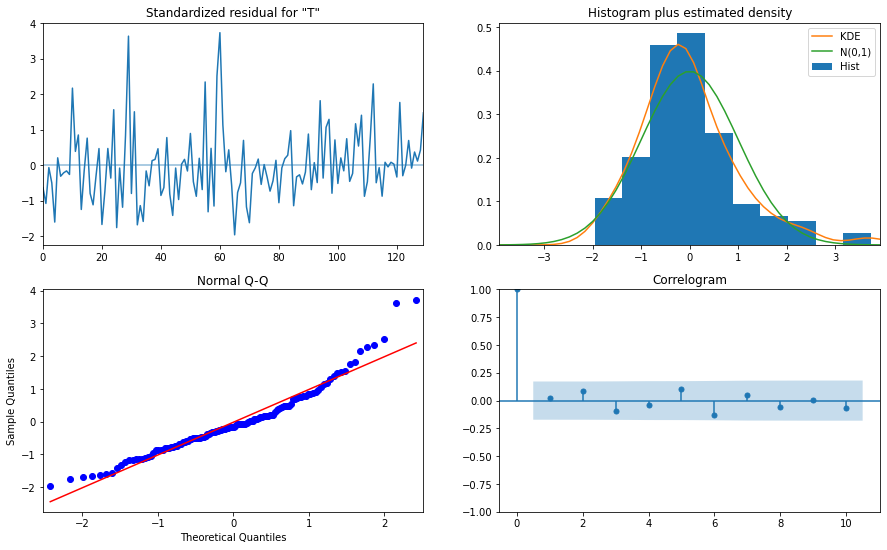

In [31]:
results.plot_diagnostics(figsize=(15, 9))
plt.show()

In [ ]:
dftiny.sort_index()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-20 06:44:00'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = dftiny['2016-01-01 06:44:00':].plot(label='observed', figsize=(16, 10))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Departure Delay in seconds')
plt.legend()

plt.show()

In [ ]:
delay_forecasted = pred.predicted_mean
delay_truth = dftiny['2016-01-20':]

# Compute the mean square error
mse = ((delay_forecasted - delay_truth) ** 2).mean()
# Compute root mean squared error
rms = np.sqrt(mean_squared_error(y_test, y_pred))


print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = df_co2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), df_co2.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels [ppmv]')

plt.legend()
plt.show()